In [78]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sb
%config IPCompleter.greedy=True

In [79]:
dataset = pd.read_csv("data/children_lung_v1.txt", sep="\s")

/home/dat-tran/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [80]:
dataset.head()

,age,FEV,ht,Unnamed: 3,Unnamed: 4,sex,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,smoke
0,9,1.708,57.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0
1,8,1.724,67.5,NaN,NaN,0,NaN,NaN,NaN,NaN,0
2,7,1.720,54.5,NaN,NaN,0,NaN,NaN,NaN,NaN,0
3,9,1.558,53.0,NaN,NaN,1,NaN,NaN,NaN,NaN,0
4,9,1.895,57.0,NaN,NaN,1,NaN,NaN,NaN,NaN,0


In [81]:
dataset = dataset.drop(["Unnamed: 3", "Unnamed: 4", "Unnamed: 6", "Unnamed: 7", "Unnamed: 8", "Unnamed: 9"], axis=1)

In [82]:
dataset.head()

,age,FEV,ht,sex,smoke
0,9,1.708,57.0,0,0
1,8,1.724,67.5,0,0
2,7,1.720,54.5,0,0
3,9,1.558,53.0,1,0
4,9,1.895,57.0,1,0


In [83]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 0 to 653
Data columns (total 5 columns):
age      654 non-null int64
FEV      654 non-null float64
ht       654 non-null float64
sex      654 non-null int64
smoke    654 non-null int64
dtypes: float64(2), int64(3)
memory usage: 25.6 KB


In [84]:
dataset.describe(include='all')

,age,FEV,ht,sex,smoke
count,654.000000,654.000000,654.000000,654.000000,654.000000
mean,9.931193,2.636780,61.143578,0.513761,0.099388
std,2.953935,0.867059,5.703513,0.500193,0.299412
min,3.000000,0.791000,46.000000,0.000000,0.000000
25%,8.000000,1.981000,57.000000,0.000000,0.000000
50%,10.000000,2.547500,61.500000,1.000000,0.000000
75%,12.000000,3.118500,65.500000,1.000000,0.000000
max,19.000000,5.793000,74.000000,1.000000,1.000000


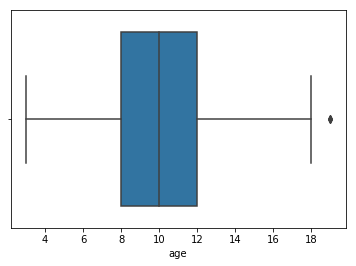

In [85]:
sb.boxplot(dataset.age)

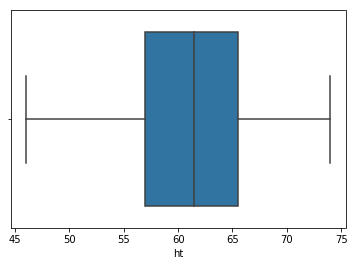

In [86]:
sb.boxplot(dataset.ht)

In [87]:
dataset.groupby(by="sex").count()

,age,FEV,ht,smoke
sex,,,,
0,318,318,318,318
1,336,336,336,336


In [88]:
dataset.corr()

,age,FEV,ht,sex,smoke
age,1.000000,0.756459,0.791944,0.029144,0.404252
FEV,0.756459,1.000000,0.868135,0.208415,0.245425
ht,0.791944,0.868135,1.000000,0.159029,0.280387
sex,0.029144,0.208415,0.159029,1.000000,-0.075612
smoke,0.404252,0.245425,0.280387,-0.075612,1.000000


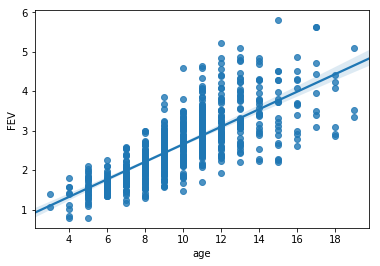

In [89]:
sb.regplot(x = dataset.age, y = dataset.FEV, data = dataset)

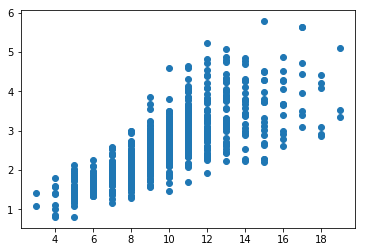

In [90]:
plt.scatter(dataset.age, dataset.FEV)

### Áp dụng Simple Linear Regression để dự đoán FEV từ Age

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
x = dataset[['age']]
y = dataset[['FEV']]

In [92]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [93]:
lr = LinearRegression()

In [94]:
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [95]:
lr.intercept_

array([0.44903295])

In [96]:
lr.coef_

array([[0.2187909]])

In [97]:
y_pred = lr.predict(x_test)

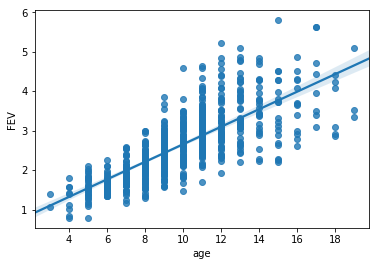

In [98]:
sb.regplot(x = dataset.age, y = dataset.FEV)

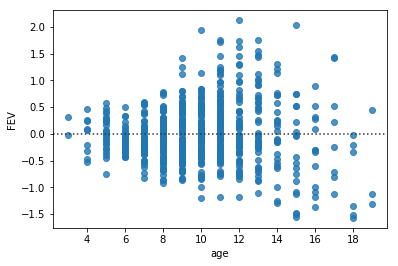

In [99]:
sb.residplot(x = dataset.age, y = dataset.FEV)

In [101]:
print("MSE of Simple Linear Regression:", mean_squared_error(y_test, y_pred))

MSE of Simple Linear Regression: 0.31028648885822313


In [106]:
print("test R2 score of Simple Linear Regression:", lr.score(x_test, y_test))

test R2 score of Simple Linear Regression: 0.5733139770897031


In [105]:
print("training R2 score of Simple Linear Regression:", lr.score(x_train, y_train))

training R2 score of Simple Linear Regression: 0.5706471566363429


In [109]:
from sklearn.model_selection import cross_val_score
cross = cross_val_score(lr, x_train, y_train, cv = 5)
cross

array([0.59903783, 0.56984438, 0.48245461, 0.62889059, 0.51684652])